In [117]:
# Imports
import os
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
# Import data
with open("dump/train_vld1.pkl", "rb") as f:
    X_train, X_vld, y_train, y_vld = pkl.load(f)

In [ ]:
# Model: Extra Trees
# sklearn trees perform feature selection

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X_train, y_train)

In [5]:
# Evaluate performance on train and validation set
# ROC curve, confusion matrix... (class imbalance)
y_pred_train = forest.predict(X_train)
y_pred_vld = forest.predict(X_vld)

print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

print(classification_report(y_vld, y_pred_vld))
print(confusion_matrix(y_vld, y_pred_vld))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12750
           1       0.99      0.93      0.96      4212

    accuracy                           0.98     16962
   macro avg       0.98      0.96      0.97     16962
weighted avg       0.98      0.98      0.98     16962

[[12709    41]
 [  305  3907]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4246
           1       0.65      0.59      0.62      1408

    accuracy                           0.82      5654
   macro avg       0.76      0.74      0.75      5654
weighted avg       0.81      0.82      0.82      5654

[[3800  446]
 [ 577  831]]


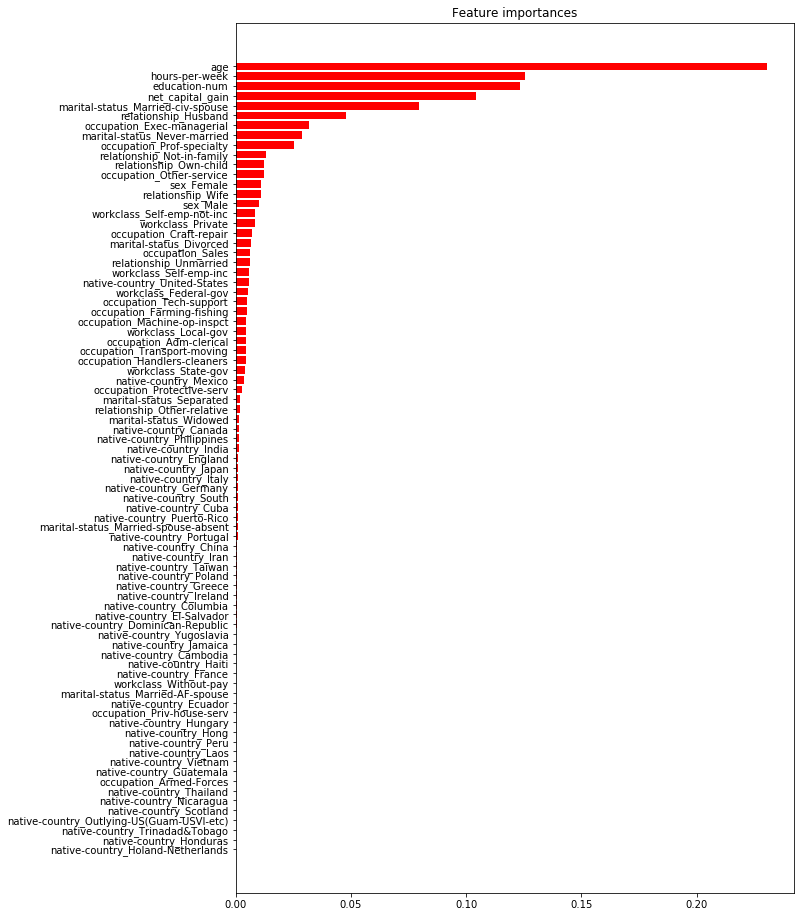

In [75]:
# ExtraTrees feature selection
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

# for i in indices[:10]:
#     print("{}: {:.5f}".format(colnames[i], importances[i]))
    
# Plot the feature importances of the forest
fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
# plt.xlim([-1, X.shape[1]])
plt.show()

In [105]:
# Model: XGBoost
watchlist = [(X_vld, y_vld)]
xgb = XGBClassifier(max_depth=2, learning_rate=1)
xgb.fit(X_train, y_train, eval_set=watchlist)

[0]	validation_0-error:0.17297
[1]	validation_0-error:0.15688
[2]	validation_0-error:0.15263
[3]	validation_0-error:0.14892
[4]	validation_0-error:0.14892
[5]	validation_0-error:0.14963
[6]	validation_0-error:0.14503
[7]	validation_0-error:0.14450
[8]	validation_0-error:0.14468
[9]	validation_0-error:0.14238
[10]	validation_0-error:0.14114
[11]	validation_0-error:0.14149
[12]	validation_0-error:0.13902
[13]	validation_0-error:0.13849
[14]	validation_0-error:0.14096
[15]	validation_0-error:0.13902
[16]	validation_0-error:0.13866
[17]	validation_0-error:0.13866
[18]	validation_0-error:0.13937
[19]	validation_0-error:0.13866
[20]	validation_0-error:0.13813
[21]	validation_0-error:0.13513
[22]	validation_0-error:0.13424
[23]	validation_0-error:0.13283
[24]	validation_0-error:0.13371
[25]	validation_0-error:0.13477
[26]	validation_0-error:0.13495
[27]	validation_0-error:0.13283
[28]	validation_0-error:0.13247
[29]	validation_0-error:0.13265
[30]	validation_0-error:0.13300
[31]	validation_0-

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [114]:
# Make predictions
y_pred_train1 = xgb.predict(X_train)
y_pred_vld1 = xgb.predict(X_vld)

print(classification_report(y_train, y_pred_train1))
print(confusion_matrix(y_train, y_pred_train1))

print(classification_report(y_vld, y_pred_vld1))
print(confusion_matrix(y_vld, y_pred_vld1))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12750
           1       0.80      0.69      0.74      4212

    accuracy                           0.88     16962
   macro avg       0.85      0.81      0.83     16962
weighted avg       0.88      0.88      0.88     16962

[[12018   732]
 [ 1318  2894]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4246
           1       0.77      0.66      0.71      1408

    accuracy                           0.87      5654
   macro avg       0.83      0.80      0.81      5654
weighted avg       0.86      0.87      0.86      5654

[[3977  269]
 [ 483  925]]


[0.01681748 0.06100175 0.03774114 0.01892258 0.02220177 0.00643219
 0.00274175 0.00196497 0.01407976 0.00581373 0.         0.0049012
 0.         0.39328274 0.00180776 0.01831609 0.00185288 0.00207871
 0.00517142 0.         0.00352283 0.1251579  0.01753997 0.00739098
 0.00165562 0.01870866 0.00096598 0.02236735 0.01451548 0.00717651
 0.04112683 0.00933993 0.01054093 0.02018385 0.00459325 0.00594893
 0.00742153 0.01659946 0.00943748 0.         0.         0.00173324
 0.00374545 0.00238219 0.         0.00076556 0.         0.00122451
 0.00113881 0.         0.00063922 0.         0.00140682 0.00245474
 0.         0.         0.         0.         0.         0.
 0.         0.00165127 0.         0.00125489 0.         0.00991711
 0.         0.         0.00173531 0.         0.         0.00346414
 0.         0.         0.         0.         0.         0.
 0.0047572  0.00161693 0.00079128]


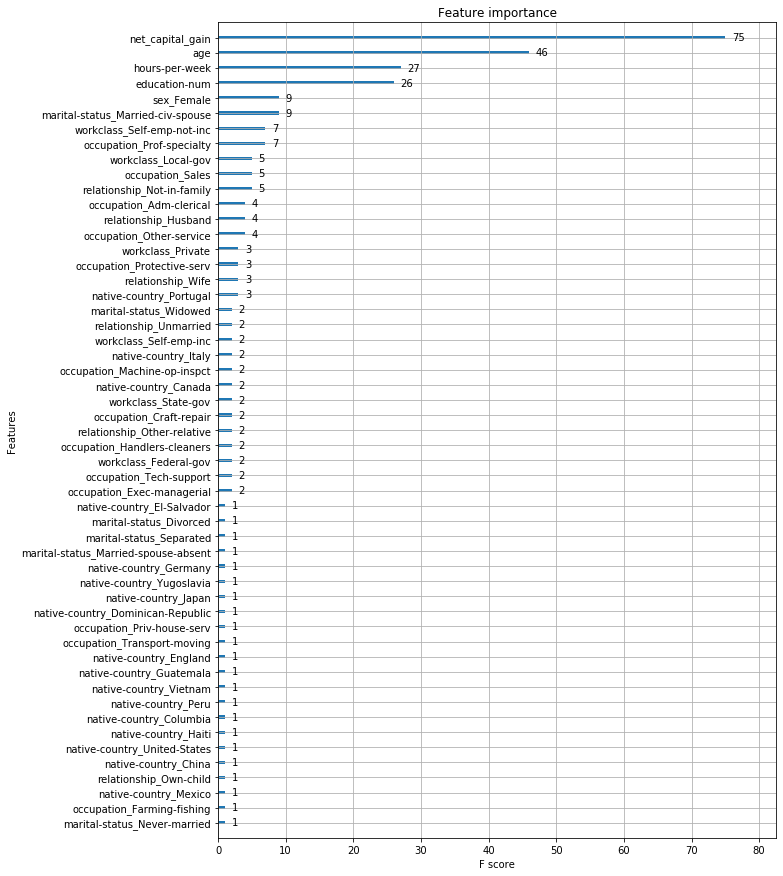

In [120]:
# Feature importance
print(xgb.feature_importances_)
# Built in function that uses F-scores to rank
fig, ax = plt.subplots(1, 1, figsize=(10,15))
plot_importance(xgb, ax=ax)
plt.show()

In [ ]:
# PARAMETERS TO HANDLE CLASS IMBALANCE
# scale_pos_weight parameter? (results in funny prediction probabilities)
# to avoid that set max_delta_step
# GET A ROUGH IDEA OF GOOD PARAMETERS AND THEN SELECT FEATURES AND NORMALISE FEATURES

# OBSERVE FOR OVERFITTING
# HOW TO AVOID OVERFITTING?
# DECREASE MODEL COMPLEXITIYY
# ADD RANDOMNESS
# https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html

In [ ]:
# # select features using threshold
# selection = SelectFromModel(model, threshold=thresh, prefit=True)
# select_X_train = selection.transform(X_train)
# # train model
# selection_model = XGBClassifier()
# selection_model.fit(select_X_train, y_train)
# # eval model
# select_X_test = selection.transform(X_test)
# y_pred = selection_model.predict(select_X_test)

In [83]:
# # Model: XGBoost
# # Not sklearn API

# # Convert data
# dmat_train = xgb.DMatrix(X_train, y_train)
# dmat_vld = xgb.DMatrix(X_vld, y_vld)

# # specify parameters via map
# param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
# num_round = 2
# watchlist = [(dmat_train, 'eval'), (dmat_train, 'train')]
# bst = xgb.train(param, dmat_train, num_round, watchlist)

[0]	eval-error:0.17586	train-error:0.17586
[1]	eval-error:0.16390	train-error:0.16390
